<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Actividades_clase/Actividad_06_interpolacion.pynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Actividad 6
### Métodos computacionales para físicos  y astrónomos
### Universidad de Antioquia
### Prof: Hernan D. Salinas Jiménez
Ref: https://github.com/restrepo/ComputationalMethods

__Activity__:  Movement with uniform acceleration
1. Define a polynomial for the movement with uniform acceleration:
\begin{align}
x(t)=x_0+v_0 (t-t_0)+\tfrac{1}{2} a (t-t_0)^2 \,,
\end{align}
2. Use the previous formula expressed as polynomial of degree 2, to solve the following problem with `np.poly1d`: 
    * A car departs from rest with a constant acceleration of $6\text{m}\cdot\text{s}^{-2}$ and travels through a flat and straight road. 10 seconds later a second pass for the same starting point and in the same direction with an initial speed of $10\text{m}\cdot\text{s}^{-1}$ and a constant acelleration of $10\text{m}\cdot\text{s}^{-2}$. Find the time and distance at which the two cars meet. *
    
_Hint_. 
\begin{align}
x(t)=x_0-v_0t_0+\frac{1}{2}at_0^2 +(v_0-at_0)t+\tfrac{1}{2} a t^2 
\end{align}



In [ ]:
# primer carro
x_0=0
v_0=0
a_1=6 #m/s^2
t_0=0 #s


#para el carro 2


t_02= 10 #s despues del primero 
v_02=10 #m/s
a_2=10 #m/s


In [ ]:
#definimos el polinomio 
def movimiento(x_0,v_0,t_,a):
  x= x_0 - v_0 * t_0 + 0.5 * a* t_0**2 + (v_0 - a*t_0)*t + 0.5 * a * t**2
  return

In [ ]:
#para el carro 1
carro1 = np.poly1d([0.5*a_1,v_0-a_1*t_0,x_0-v_0*t_0+0.5*a_1*t_0**2])
print(carro1)

   2
3 x


In [ ]:
#para el carro 2
carro2 = np.poly1d([0.5*a_2,v_02-a_2*t_02,x_0-v_02*t_02+0.5*a_2*t_02**2])
print(carro2)

   2
5 x - 90 x + 400


In [ ]:
#tiempo que se demorara en ecnotrantse
tiempo = np.roots(carro2-carro1)
tiempo[0]

40.0

In [ ]:
#distanncia entre los carros 
distancia = carro1(tiempo[0])
distancia

4800.0

__Activity__: For  the function $f(x) = \tan (x)$ between $-\frac{\pi}{4}$ and $\frac{\pi}{4}$ using $N=10$ points (9 intervals). Plot both, the interpolation and the original function.

Explore the behaviour of the Linear Interpolation algorithm when varying the number of data used.



In [ ]:
from scipy import interpolate
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x=np.linspace(-np.pi/4,np.pi/4,10)
funcion = np.tan(x)
funcion

array([-1.        , -0.70020754, -0.46630766, -0.26794919, -0.08748866,
        0.08748866,  0.26794919,  0.46630766,  0.70020754,  1.        ])

In [ ]:
inter = interpolate.interp1d(x,funcion)
inter

<function matplotlib.pyplot.grid(visible=None, which='major', axis='both', **kwargs)>

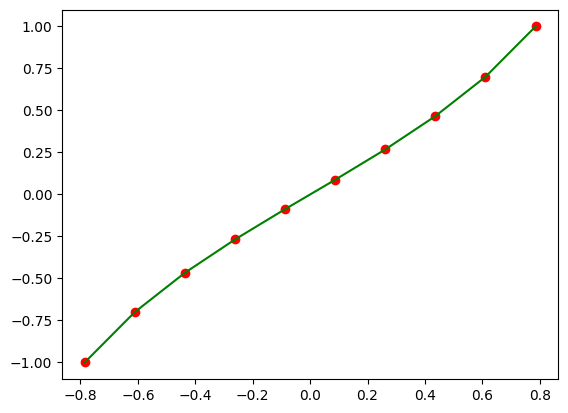

In [ ]:
plt.plot(x,funcion,"ro")
plt.plot(x,inter(x),"g-")
plt.grid



__Activity__: Apply lagrange interpolations with the following points, work with pandas data frame


x =  np.array([1, 1.3, 1.6, 1.9, 2.2])

fx =  np.array([0.7651977,0.6200860, 0.4554022, 0.2818186, 0.1103623])

In [ ]:
x =  np.array([1, 1.3, 1.6, 1.9, 2.2])
fx = np.array([0.7651977,0.6200860, 0.4554022, 0.2818186, 0.1103623])

In [ ]:
p= interpolate.lagrange(x,fx)

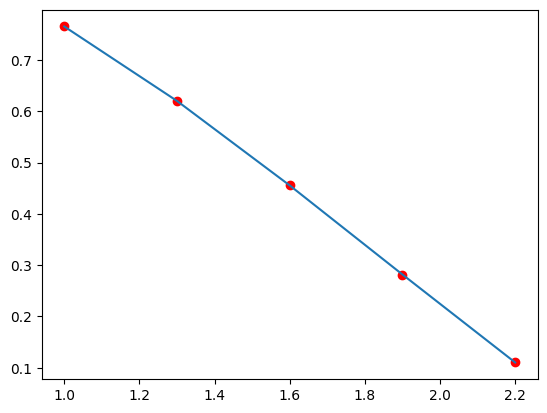

In [ ]:

plt.plot(x,fx,"ro")
plt.plot(x,p(x))
plt.show()


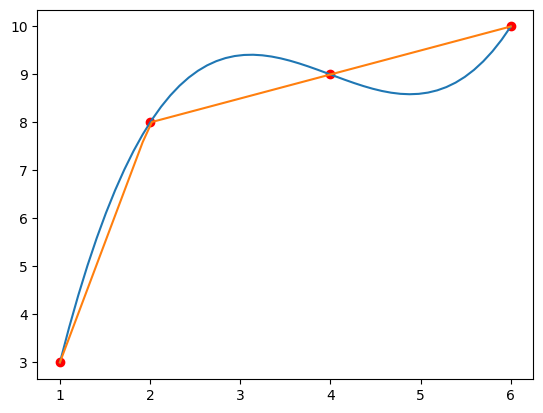

In [ ]:
x_ = np.array([1,2,4,6])
y_ = np.array([3,8,9,10])
f  = interpolate.interp1d(x_,y_,kind="linear")
g = interpolate.interp1d(x_,y_,kind="cubic")
x  = np.linspace(np.min(x_),np.max(x_))
plt.plot(x_,y_,"ro")
plt.plot(x,g(x))
plt.plot(x,f(x))
plt.show()




__Activity__: Consideremos la imagen del planetario de medellin u otra imagen sobre la cual podamos realizar un ajuste, descargue la imagen de google.


![img](https://github.com/hernansalinas/autogrades/blob/main/Actividades_clase/imagenes/planetario.png?raw=true)
1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`) 

2. Definir una lista de puntos, $x_i$, equiespaciados en $[a,b]$,  definidos adecuadamente para que los puntos esten (aproximadamente) situados en la superficie del domo,  del edificio que representa la imagen.

3. Representar el polinomio de interpolación de Lagrange en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`), 



5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

In [ ]:
%matplotlib notebook

<IPython.core.display.Javascript object>


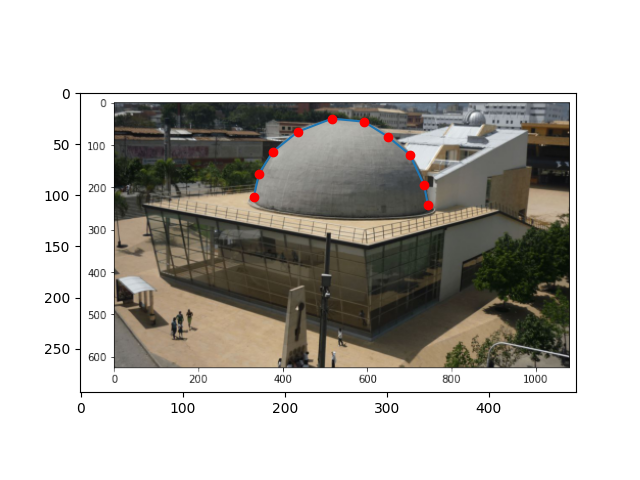

In [ ]:
plt.figsize=(6.5,4)
im = plt.imread("planetarioo.png")
x = np.array([169.9,174.8,188.5,213.0,246.3,277.7,301.2,322.8,336.5,340.4])
y = np.array([101.1,78.6,57.1,37.5,24.7,27.7,42.4,60,89.4,109])
f  = interpolate.CubicSpline(x,y)
plt.imshow(im)
plt.plot(x,f(x))
plt.plot(x,y,"ro")

In [ ]:
from scipy.interpolate import lagrange

In [ ]:
poly = lagrange(x,y)
print(poly)

            9            8             7             6            5
-3.602e-16 x + 9.24e-13 x - 1.036e-09 x + 6.678e-07 x - 0.000273 x
            4         3        2
 + 0.07347 x - 13.03 x + 1469 x - 9.559e+04 x + 2.737e+06


<IPython.core.display.Javascript object>


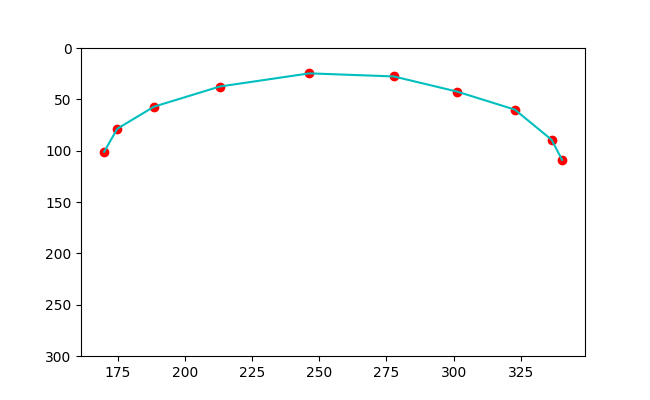

In [ ]:
fig , ax = plt.subplots(figsize=(6.5,4))
ax.plot(x,y,"ro")
ax.plot(x,poly(x),"c") #lagrange
ax.set_ylim(300,0)
plt.show()

<IPython.core.display.Javascript object>


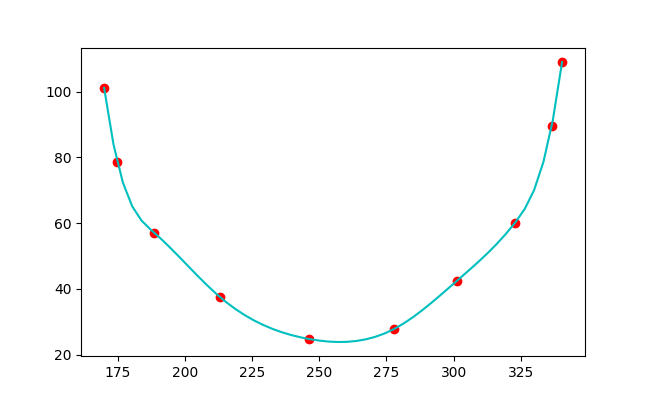

In [ ]:
fig , ax = plt.subplots(figsize=(6.5,4))
ax.plot(x,y,"ro")
x  = np.linspace(np.min(x),np.max(x))
ax.plot(x,f(x),"c") #cubicspline
plt.show()